# Analyse Bitcoin price dynamics using LTSM

Goals: we will analyse Bitcoin price dynamics and understand more about the Long Short-Term Memory neural networks, as a way to improve on recurrent neural networks.  


## Let’s Decode the Future of Bitcoin Using Neural Networks
In this project, we’re diving into the world of Bitcoin price dynamics—and we’re doing it with the power of Long Short-Term Memory (LSTM) neural networks. LSTMs are a powerful upgrade to traditional Recurrent Neural Networks (RNNs), especially when we’re dealing with time series data like stock prices or cryptocurrency trends.


  
##  Predicting Stock Prices with Neural Networks


Recurrent Neural Networks were a major step forward in handling sequential data—whether it's financial time series, speech, text, weather, or even video. RNNs outperform classical machine learning algorithms by understanding context and patterns across sequences.

But here’s the catch: RNNs struggle when it comes to long-term dependencies. They tend to “forget” information that occurred many steps earlier. That’s a big problem in real-world scenarios—like tracking stock or crypto prices over time. That’s where LSTMs come in.

Back in the late '90s, LSTMs were introduced to tackle this exact issue. And they’ve been game-changers ever since.

  
### Why Traditional Models Fall Short
Let’s take a stock or crypto price as an example. A simple machine learning model can predict prices based on features like volume, opening value, etc. But financial markets don’t just work in isolated moments—there’s a story unfolding over days, weeks, months.

Traders know this. Yesterday’s trends impact today’s decisions. But traditional feed-forward neural networks treat every input as independent. No memory of the past = no real context. That’s a problem.

RNNs address this by introducing time awareness—but only to a point. They’re good for short-term patterns, not so great for the long game.  
  
  If youa re interested, I talk more about the vanishing gradient problem in the [accompanying blog post](https://mashimo.wordpress.com/2025/04/07/analyse-bitcoin-price-dynamics-using-ltsm/).

### So Why Use LSTMs?
    
LSTMs are built to handle long-term memory. It’s literally in the name—Long Short-Term Memory.  This algorithm was first introduced by Hochreiter and Schmidhuber in 1997.  
They're designed to hold on to relevant information across longer sequences. And they do this using a clever internal architecture involving memory cells and gates.

Let’s go back to our stock price prediction example. Today’s price might be influenced by:

- The overall trend over the past week or month.
- Yesterday’s price movement (a key signal for many traders).
- External events—maybe a surprising leadership change, a disappointing earnings report, or sudden regulatory news.  
  
To capture all that, LSTMs use:

- The previous cell state (i.e., memory from the last step),
- The previous hidden state (what the model “said” last time),
- And the current input (what’s happening now).  
  
Each LSTM cell uses three gates:

- The forget gate decides what past information to discard.
- The input gate controls what new info to add to memory.
- The output gate decides what to share as output.  
  
This gated mechanism is what allows LSTMs to model complex, time-dependent patterns in data—like the wild swings of Bitcoin.



### And Speaking of Bitcoin...
Bitcoin, launched in 2009, is the most valuable and widely traded cryptocurrency on the planet. It’s available on over 40 exchanges and supports trading in more than 30 fiat currencies. But what really sets Bitcoin apart is its extreme volatility.

This makes it an ideal candidate for forecasting experiments—especially with deep learning models like LSTMs that are designed to find patterns in chaos.

## Read the data
The data, High-Frequency Data from 2017 to 2023, is from Kaggle:
https://www.kaggle.com/datasets/jkraak/bitcoin-price-dataset/data

I have downloaded the dataset previously and saved in a CSV file.

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('../datasets/bitcoin_2017_to_2023.csv')


In [3]:
df.shape

(3126000, 10)

There are more than 3 million entries.
This dataset offers a comprehensive record of Bitcoin's price evolution, spanning from August 2017 to July 2023. The data has been meticulously collected from the Binance API, with price data captured at one-minute intervals. Each record includes essential information such as the open, high, low, and close prices, alongside associated trading volume.
In total there are ten features:

In [4]:
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2.008947e+04,2.010217e+04,2.007666e+04,2.008946e+04,5.290800e+01,1.155882e+06,1.018583e+03,2.632231e+01,5.727211e+05
std,1.605896e+04,1.606926e+04,1.604871e+04,1.605896e+04,9.774388e+01,2.335868e+06,1.817813e+03,4.972880e+01,1.193135e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.624747e+03,7.629600e+03,7.620000e+03,7.624798e+03,1.120167e+01,1.122335e+05,1.500000e+02,5.100715e+00,5.125057e+04
50%,1.169999e+04,1.170681e+04,1.169249e+04,1.170000e+04,2.387539e+01,3.706467e+05,4.130000e+02,1.148990e+01,1.753695e+05
75%,2.989957e+04,2.990724e+04,2.989051e+04,2.989957e+04,5.393630e+01,1.276762e+06,1.026000e+03,2.693009e+01,6.210250e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 0 to 3125999
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
High, Low and Last represent the maximum, minimum, and last price of the share for the day.
Total Trade Quantity is the number of shares bought or sold in the day and Turnover (Lacs) is the turnover of the particular company on a given date.


As we said, the Dataset go from 2017 to 2023:

In [6]:
df.head(3)

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,135453.793658,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,138035.087662,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,333053.150915,451,2.70873,78290.170121


In [7]:
df.tail(3)

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851


As you can see, the first entries are the latest, from 2023.  
For convenience, we convert the time column from object to timestamp so we can sort it:


In [8]:
#converting from obj to timestamp the variable 'timestamp'
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [9]:
df = df.sort_values('timestamp', ascending=True)


In [10]:
df.head(3)

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921


In [11]:
df.isnull().values.any()

False

There are no invalid values in the dataset so we can start with analysis, no need to clean the data.





## Visualise the data

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable.  
Let’s plot the target variable to understand how it’s shaping up in our data: we start with a simple timeline chart

In [12]:
import matplotlib.pyplot as plt


In [13]:
df.index = df['timestamp']


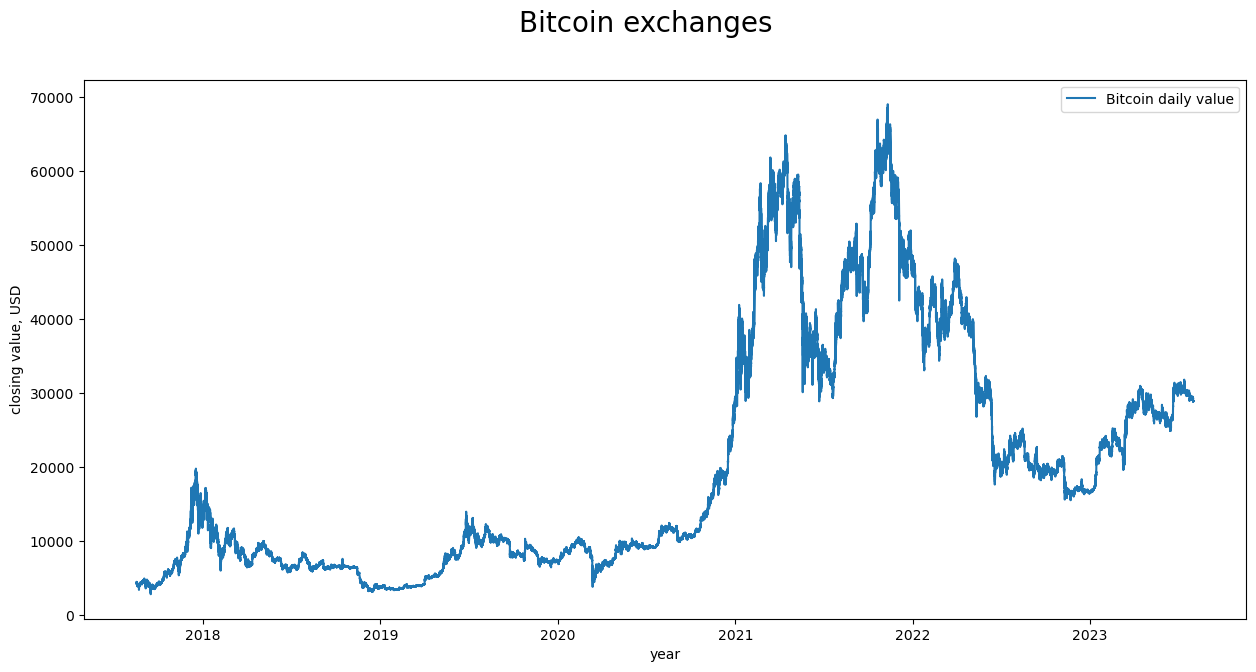

In [31]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges', fontsize=20)
plt.ylabel("closing value, USD")
plt.xlabel("year")

plt.plot(df.close, '-', label='Bitcoin daily value')
plt.legend()

plt.show()


It's a lot of data (collected every single minute, that's the high frequency) so for convenience we could sample down to weekly:

In [16]:
df_week = df.resample('W').mean()  # a new dataframe

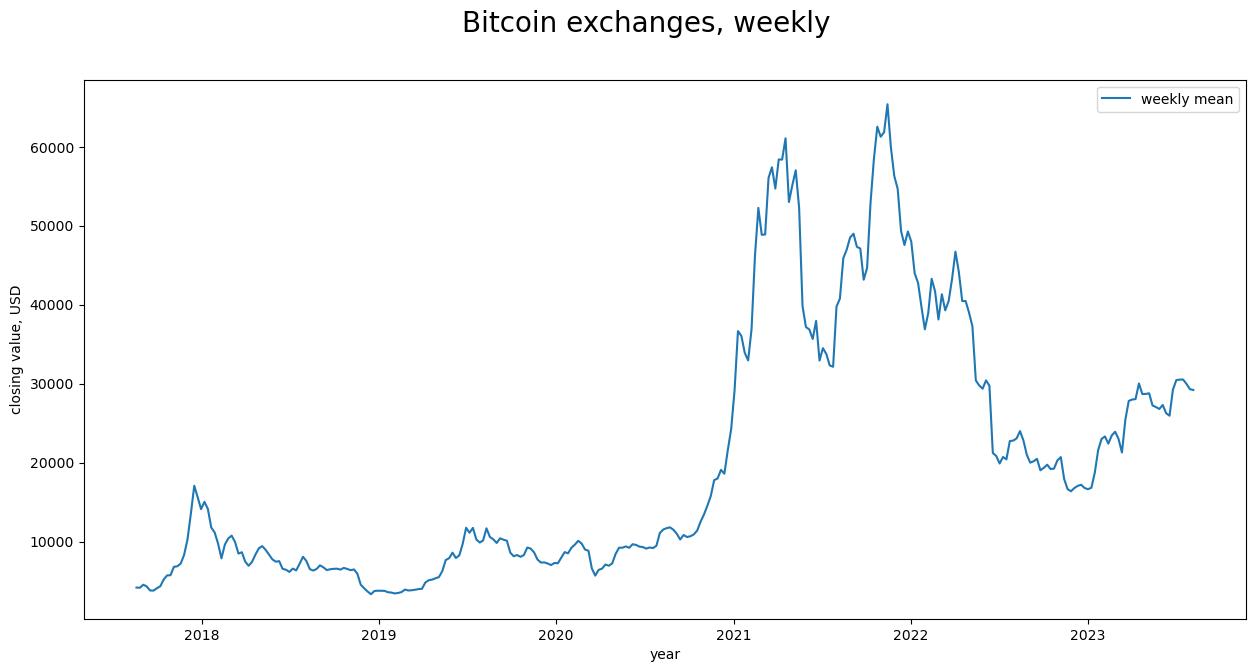

In [23]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, weekly', fontsize=20)
plt.ylabel("closing value, USD")
plt.xlabel("year")
plt.plot(df_week.close, '-', label='weekly mean')
plt.legend()

plt.show()

In [19]:
df_week.shape

(312, 10)

The weekly dataset has now 312 entries = weeks

Or we could even scale down to monthly :)

In [20]:
# Resampling to monthly frequency
df_month = df.resample('ME').mean()  # ME = Month End



In [21]:
df_month.shape

(73, 10)

Now we have only 73 entries, for 73 months.

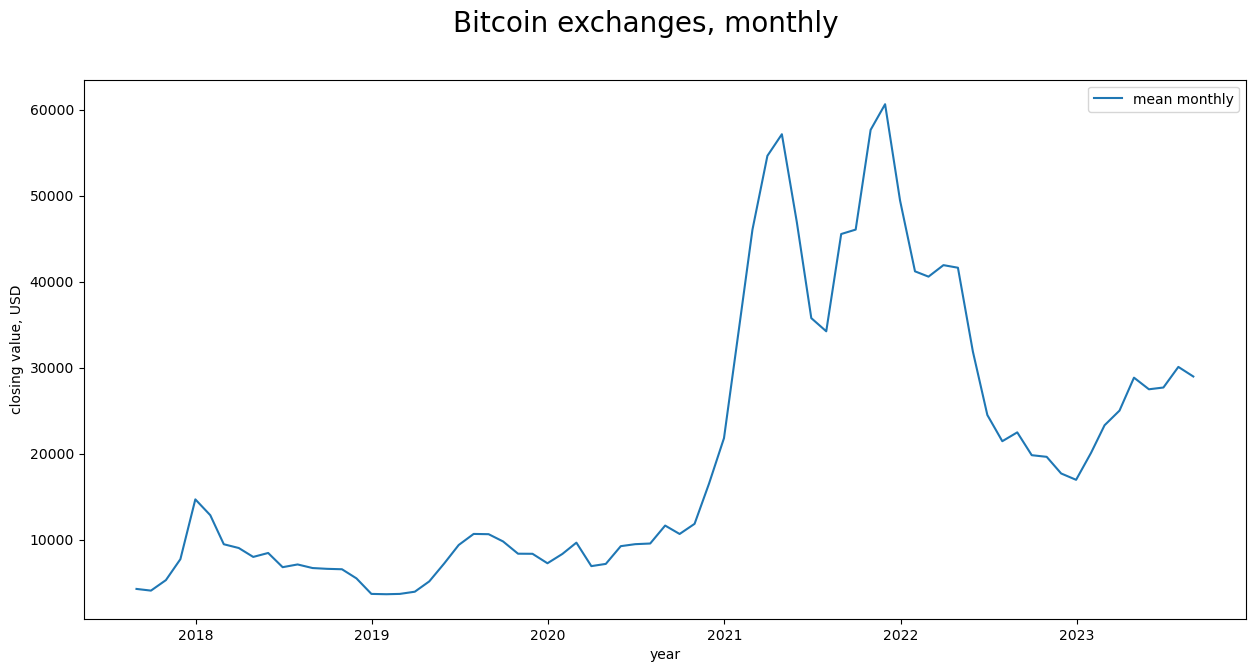

In [25]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, monthly', fontsize=20)
plt.ylabel("closing value, USD")
plt.xlabel("year")
plt.plot(df_month.close, '-', label='mean monthly')
plt.legend()

plt.show()

## Time series checks

The data are a time series (TS). We will use the monthly data for a quick check about stationarity and trends.

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time.  But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.  
  
  Let's start with autocorrelation:

In [26]:
import statsmodels.graphics.tsaplots as sm_pl


In [27]:
import statsmodels.api as sm


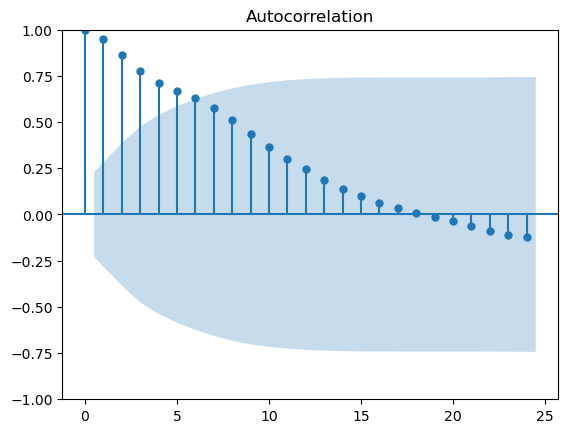

In [28]:
sm_pl.plot_acf(df_month.open, lags=24);

Note that the values of the ACF at the various lags decays quite fast. This indicates <strong>there is auto correlation but not considerable </strong>  between the time series values at the various lags, mostly not any   regular trend.  
  
Plotting a histogram provides information on the distribution of values of the time series.

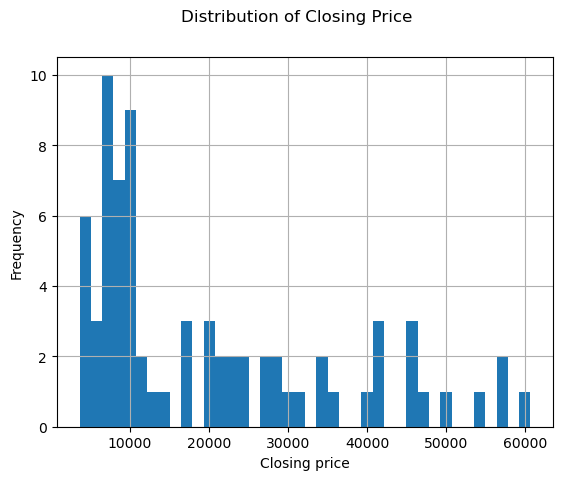

In [29]:
fig,ax = plt.subplots()
ax.hist(df_month.close, bins=40)
ax.grid(True)
ax.set_xlabel("Closing price")
ax.set_ylabel("Frequency")
fig.suptitle("Distribution of Closing Price");

The histogram of the time series shows considerable dispersion.

### Trends
Time series are typically decomposed into three components: trend, seasonal and the remainders, or residuals.<br/>
Trend can be modelled by several methods. We will start by decomposing the time series using a simple moving average model.

In [32]:
import statsmodels.nonparametric.smoothers_lowess as sml

In [33]:
trendL = sml.lowess(df_month.open, df_month.timestamp, frac=0.25,return_sorted=False)

In [34]:
rollingMean = df_month.close.rolling(window=12).mean()
rollingStd = df_month.close.rolling(window=12).std()

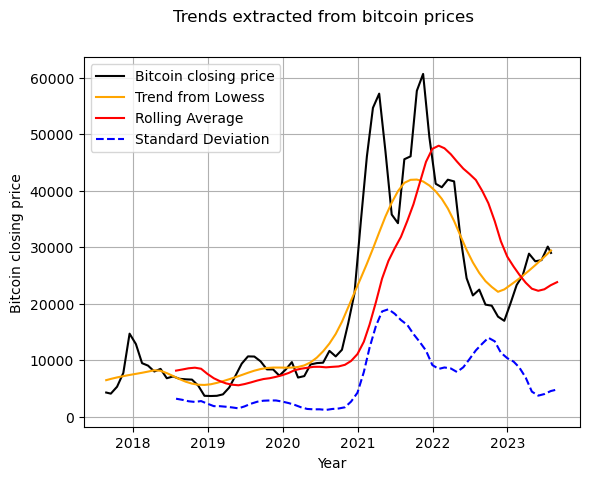

In [35]:
fig,ax = plt.subplots()

ax.plot(df_month.timestamp, df_month.close, color="black", label="Bitcoin closing price")
ax.plot(df_month.timestamp, trendL, color="orange", label="Trend from Lowess")
ax.plot(rollingMean, color="red", label="Rolling Average")
ax.plot(rollingStd, color = "blue", linestyle="--", label = "Standard Deviation")


ax.set_xlabel("Year")
ax.set_ylabel("Bitcoin closing price")
ax.legend(loc="upper left")
ax.grid(True)

fig.suptitle("Trends extracted from bitcoin prices");

The time series charts show the original time series along with the two trends. The trend from Lowess regression is a bit smoother than the one was obtained with the simple moving average decomposition.  
  
Note that the mean is increasing over time (the value is rising, not constantly, there are ups and downs) but also the standard deviation increased in the time frame.  
  

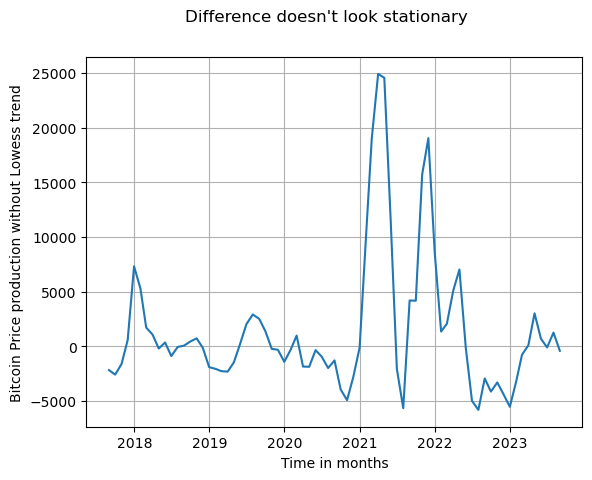

In [36]:
prodWithoutTrend = df_month.close - trendL # the difference between closing price and Lowess trend

fig,ax = plt.subplots()
ax.plot(prodWithoutTrend)

ax.grid(True)
ax.set_xlabel("Time in months")
ax.set_ylabel("Bitcoin Price production without Lowess trend")

fig.suptitle("Difference doesn't look stationary");

###  Dickey-Fuller Test
The Dickey-Fuller Test is one of the statistical tests for checking stationarity.  
Here the null hypothesis is that the TS is non-stationary.  
The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 



Dickey–Fuller test: p=0.451514


<Figure size 1500x700 with 0 Axes>

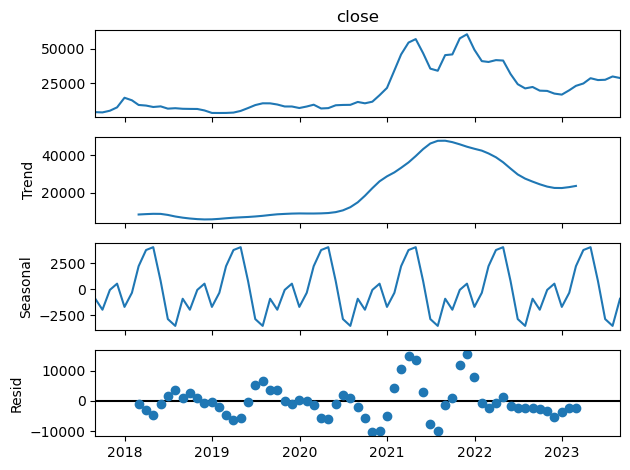

In [37]:
plt.figure(figsize=[15,7])
decomposition = sm.tsa.seasonal_decompose(df_month.close)
decomposition.plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close)[1])
plt.show();

We have already seen that the variation in standard deviation is not small and the mean is clearly increasing with time. This is not a stationary series. Also, the test statistic is way more than the critical values. 


The p-value is 0.45 which is >0.05, therefore, we cannot reject the null hypothesis and hence time series is non-stationary.

Stock prices, in general, are non-stationary and do not exhibit a particular trend or seasonality.  
They depend highly on what is currently going on in the market and thus the prices rise and fall. Hence, forecasting techniques like ARIMA, SARIMA and Prophet would not show good results for this particular problem.  
  
Next, we can see how LSTMs can handle these non-linear relationships within the data.


## Prepare the data
we have a couple of steps to make it easier to create a model

We must pre-process this data before applying stock price using LSTM. Transform the values in our data with help of the fit_transform function.  LSTM is very sensitive to the scale of the data.
Min-max scaler is used for scaling the data so that we can bring all the price values to a common scale.  
  
  A LSTM network expects the input to be in the form [samples, time steps, features] where samples is the number of data points we have, time steps is the number of time-dependent steps that are there in a single data point, features refers to the number of variables we have for the corresponding true value in Y.  
   
We finally use 80 % data for training and the rest 20% for testing and assign them to separate variables.


### reduce to high frequency


by month it's too rarely; let's keep daily and we use only the max value of the day

In [38]:
df['day'] = pd.to_datetime(df['timestamp'])  # add a column for the day
df = df.resample("D", on="day").max()
df.shape

(2176, 10)

In [39]:
df.head(3)

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
day,,,,,,,,,,
2017-08-17,2017-08-17 23:59:00,4485.39,4485.39,4485.39,4485.39,13.137162,55924.444821,48,10.959697,48622.512692
2017-08-18,2017-08-18 23:59:00,4371.42,4371.52,4371.40,4371.52,9.965330,41483.387619,41,8.294407,35839.264189
2017-08-19,2017-08-19 23:59:00,4184.68,4184.69,4184.68,4184.69,8.454840,34468.391316,31,5.835302,23305.780270


In [40]:
df.tail(3)

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
day,,,,,,,,,,
2023-07-30,2023-07-30 23:59:00,29446.10,29449.00,29439.99,29446.10,845.71462,2.467669e+07,12763,371.32009,1.083234e+07
2023-07-31,2023-07-31 23:59:00,29494.77,29530.00,29494.00,29494.77,436.14760,1.286350e+07,8709,260.18915,7.674707e+06
2023-08-01,2023-08-01 13:19:00,29347.15,29347.16,29340.41,29347.16,1440.71073,4.159548e+07,26284,527.28734,1.521617e+07


### Scaling and sequencing
First we scale the dataset to be 0-1:


In [41]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [42]:
scaler = MinMaxScaler()
scaler.fit(df.close.values.reshape(-1,1))

MinMaxScaler()

In [43]:
scaled = scaler.transform(df.close.values.reshape(-1,1))


In [44]:
scaled.shape

(2176, 1)

We need to pass sequences of data points to the neural network in the training, so we will use a helper function to get sequences of n data points.

In [45]:
# Purpose: This loop creates sequences of N time steps (past N values) to predict the next value.

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(seq_length, len(data)):
        sequences.append(data[i-seq_length:i, 0])
        labels.append(data[i, 0])
        
        # Converts lists into NumPy arrays, which are required for efficient computation in deep learning models.

    sequences = np.array(sequences)
    labels = np.array(labels)
    
        # LSTMs expect 3D input: (samples, time steps, features).
        # The target values y_train and y_test are reshaped into column vectors ((-1,1)) to match the model’s output format.

    return np.reshape(sequences, (sequences.shape[0], sequences.shape[1], 1)), np.reshape(labels, (-1, 1))


In [46]:
SEQ_LENGTH = 100  # we use sequences of 100 data points
X, y = create_sequences(scaled, SEQ_LENGTH)

In [47]:
X.shape

(2076, 100, 1)

Note that the data X,y are now in shape (lenght, SEQ_LENGTH, 1)  
  
### Split into training and testing data sets

In [48]:
train_size = int(len(X) * 0.8) # 20% for testing, 80% for training
train_size

1660

In [49]:
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [50]:
X_train.shape

(1660, 100, 1)

In [51]:
X_test.shape

(416, 100, 1)

# Model

We use two LSTM layers in our model and implement drop out in between for regularization. The number of units assigned in the LSTM parameter starts from sixty and increases.  
Mean squared error is the loss function for optimizing the problem with adam optimizer. Mean absolute error is the metric used in our LSTM network as it is associated with time-series data.

In [52]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'   # remove the warning

In [53]:
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [104]:
# for reproducibility

np.random.seed(10)
tf.random.set_seed(10)

In [87]:
def define_model():
    ingres = Input(shape=(SEQ_LENGTH,1))
    x = LSTM(units = 60, return_sequences=True)(ingres)  
    x = Dropout(0.2)(x)
    x = LSTM(units = 80, return_sequences=True)(x)
    x = Dropout(0.3)(x)
    x = LSTM(units = 100)(x)
    x = Dropout(0.5)(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=ingres, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Adam')
    model.summary()
    
    return model


model = define_model()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 60)           14880     
                                                                 
 dropout_3 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_4 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               72400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0   

Now that we have defined the TensorFlow model we can train it.  
We run 25 epochs

In [105]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/25
47/47 [==============================] - 5s 102ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 2/25
47/47 [==============================] - 5s 106ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 3/25
47/47 [==============================] - 5s 104ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 4/25
47/47 [==============================] - 5s 98ms/step - loss: 0.0020 - val_loss: 0.0026
Epoch 5/25
47/47 [==============================] - 5s 99ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 6/25
47/47 [==============================] - 5s 107ms/step - loss: 0.0019 - val_loss: 0.0035
Epoch 7/25
47/47 [==============================] - 5s 101ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 8/25
47/47 [==============================] - 5s 100ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 9/25
47/47 [==============================] - 5s 103ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 10/25
47/47 [==============================] - 5s 101ms/step - loss: 0.0020 - val_loss: 8.8724e-

In [106]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test) 


13/13 [==============================] - 1s 30ms/step


In [107]:
from sklearn.metrics import mean_absolute_percentage_error


In [108]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)


In [109]:
Accuracy = 1 - MAPE


In [110]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)


Test Loss: 0.000297199294436723
Test MAPE: 0.04085639293358491
Test Accuracy: 0.9591436070664151


Accuracy is 95% on the test datase, definitely not bad.  
We can see the predicted values on the chart but we first need to scale them back.

In [111]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)


In [112]:
test_size = X_test.shape[0]
test_size

416

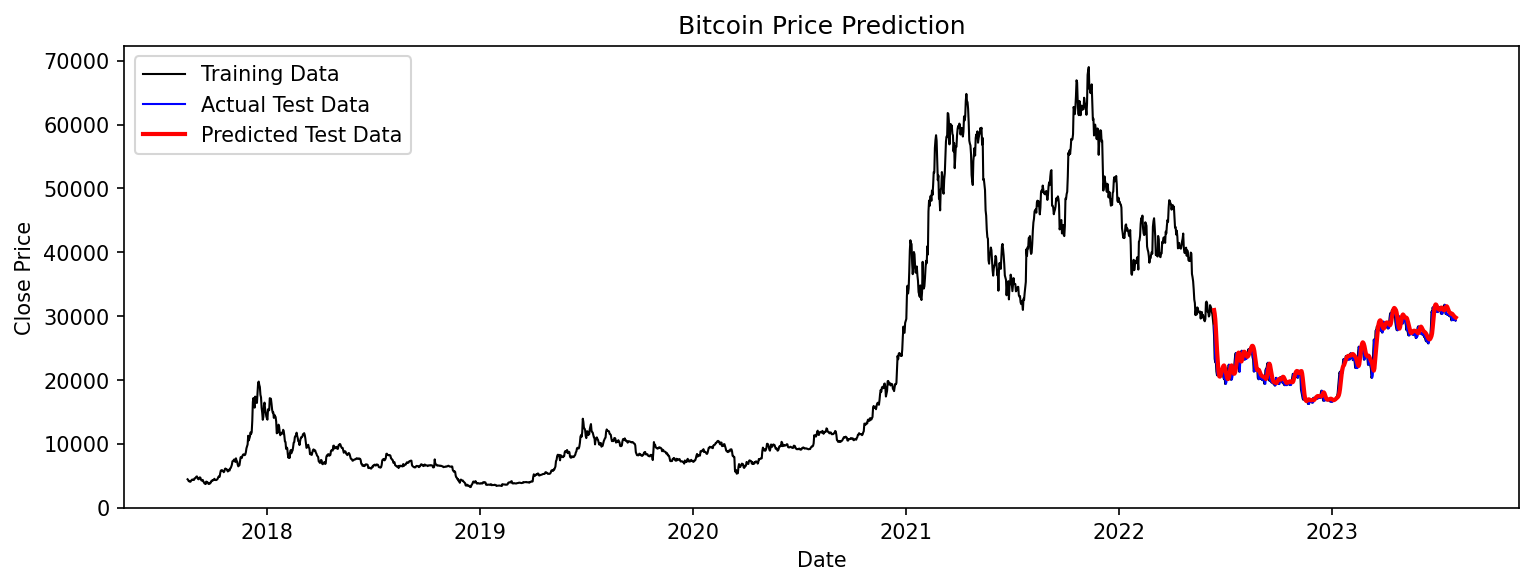

In [113]:
plt.figure(figsize=(12, 4), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.plot(df.close, color='black',lw=1)

plt.plot(df['timestamp'].iloc[-test_size:], y_test_true, color='blue', lw=1)
plt.plot(df['timestamp'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left')
plt.show()


The predicted values are very very close to the actual values but how will the model behave with new predictions?

In [114]:
# Since the LSTM model was trained using N past values to predict the next one, 
# we need to provide a sequence of the last N closing prices as input.


latest_data = df.close[-SEQ_LENGTH:].values  # Get the last N closing prices
latest_data = scaler.transform(latest_data.reshape(-1, 1))  # Scale it  
# the shape shall be (100,1)

In [115]:
latest_data = np.array(latest_data).reshape(1, SEQ_LENGTH, 1)  # Reshape for model input


In [116]:
latest_data.shape

(1, 100, 1)

In [122]:
predicted_scaled = model.predict(latest_data, verbose=0)
# This outputs a scaled prediction, meaning it needs to be inverse-transformed back to the original price scale.


In [118]:
predicted_scaled

array([[0.4032411]], dtype=float32)

In [119]:
predicted_price = scaler.inverse_transform(predicted_scaled.reshape(-1, 1))
print(f"Predicted next closing price: {predicted_price[0][0]}")


Predicted next closing price: 29772.052734375


## Test with new values

If we want to predict more than one future step, we can iteratively feed each predicted value back into the model via a loop for the number of days wished.

In [123]:
DAYS_TO_PREDICT = 150

future_predictions = []
input_sequence = latest_data.copy()  # Start with the last known values

for _ in range(DAYS_TO_PREDICT):  # Predict the next X days
    next_pred = model.predict(input_sequence, verbose=0);
    next_pred_actual = scaler.inverse_transform(next_pred.reshape(-1, 1))[0][0]  # Convert back to price
    
    future_predictions.append(next_pred_actual)  # Store prediction
    
    # Update input sequence: remove first value, add new prediction
    new_input = np.append(input_sequence[0, 1:, 0], next_pred)  # Shift left and add new
    input_sequence = new_input.reshape(1, SEQ_LENGTH, 1)  # Reshape for LSTM

print(f"Next predicted prices: {future_predictions[0]} ...")


Next predicted prices: 29772.052734375 ...


To check if the predicted values are accurate we can get the actual values, they are publicly available.  
For example we can use the Binance API:

In [74]:
import datetime
import requests


In [75]:
symbol = 'BTCUSDT' #Choosing Bitcoin 

interval = '1d'  # Daily interval. Other allowed intervals include: ['1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d', '3d', '1w', '1M']

start_time = 1690942284000  # Timestamp for August 2, 2023, 00:00:00 UTC
end_time = 1703988684000 # Timestamp for August 31, 2023, 00:00:00 UTC

limit= 1000   # By default the API call returns 500 records with 1000 as the limit


In [76]:
url = f"https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}&startTime={start_time}&endTime={end_time}&limit={limit}"

#GET Request
response = requests.get(url)

In [77]:
#JSON Conversion
data = response.json()

In [78]:
type(data)

list

In [79]:
len(data)

151

In [81]:
data[0]

[1691020800000,
 '29186.00000000',
 '29433.33000000',
 '28968.00000000',
 '29193.64000000',
 '26476.91994000',
 1691107199999,
 '773302705.49476290',
 651970,
 '12901.09228000',
 '376856740.48839370',
 '0']

In [124]:
#naming the columns
col_names = ["open_time", "Open","High","Low","Close","Volume", "close_time","quote_asset_volume","number_of_trades","taker_buy_asset_volume","taker_buy_quote_volume","ignored_data" ]

#creating a df
dfNewBTC = pd.DataFrame(data, columns=col_names)

In [125]:
dfNewBTC.head()

,open_time,Open,High,Low,Close,Volume,close_time,quote_asset_volume,number_of_trades,taker_buy_asset_volume,taker_buy_quote_volume,ignored_data
0,1691020800000,29186.00000000,29433.33000000,28968.00000000,29193.64000000,26476.91994000,1691107199999,773302705.49476290,651970,12901.09228000,376856740.48839370,0
1,1691107200000,29193.65000000,29333.08000000,28807.54000000,29113.99000000,23551.95217000,1691193599999,686643453.39309040,544850,10539.62903000,307284659.32142800,0
2,1691193600000,29114.00000000,29152.23000000,28978.64000000,29072.13000000,11645.52018000,1691279999999,338478560.12182470,331924,5491.49620000,159611625.16587780,0
3,1691280000000,29072.13000000,29205.09000000,28991.88000000,29088.42000000,13178.19720000,1691366399999,383209498.87775050,338654,6471.24487000,188192943.69621700,0
4,1691366400000,29088.43000000,29276.78000000,28701.03000000,29211.06000000,30966.87746000,1691452799999,899492595.68127170,671438,15375.49318000,446702609.56457520,0


In [131]:
realValues = dfNewBTC['Close']

In [82]:
#alternative way if the API stops working
#realValues = pd.read_csv('../datasets/btc-close.csv')# often works 


In [132]:
realValues.head()

0    29193.64000000
1    29113.99000000
2    29072.13000000
3    29088.42000000
4    29211.06000000
Name: Close, dtype: object

In [133]:
len(realValues)

151

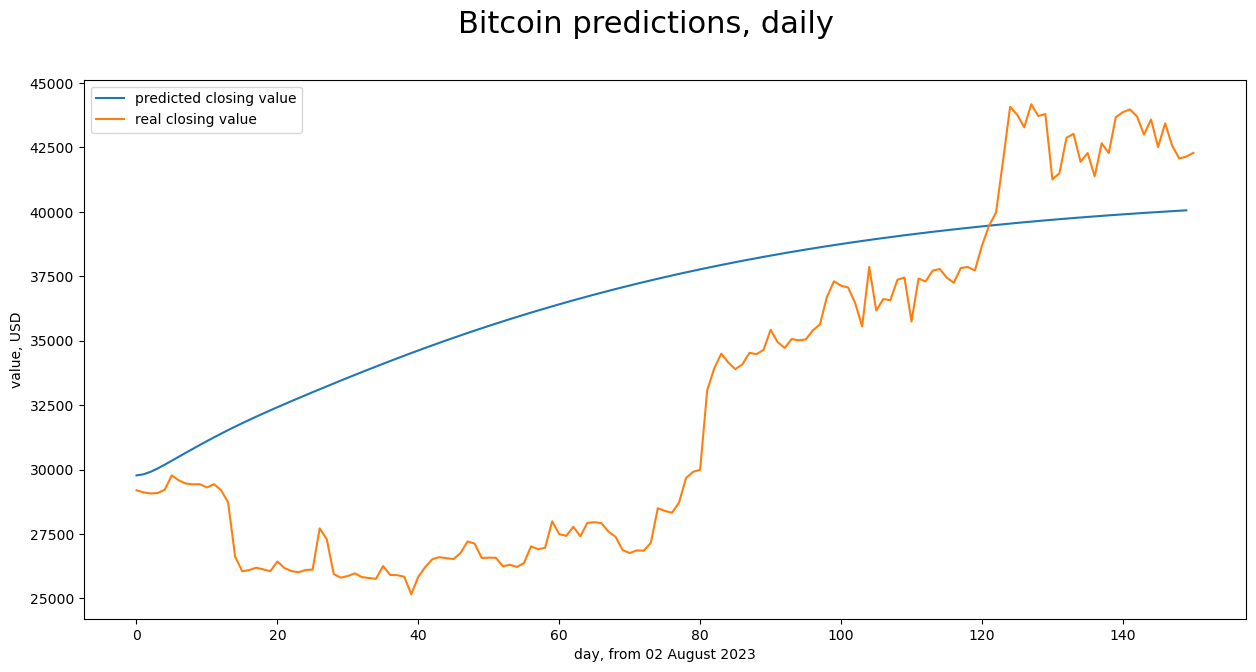

In [121]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin predictions, daily', fontsize=22)
plt.ylabel("value, USD")
plt.xlabel("day, from 02 August 2023")
plt.plot(future_predictions, '-', label='predicted closing value')
plt.plot(realValues.Close, '-', label='real closing value')

plt.legend()

plt.show()

As you can see, the predicted values are kind of a gradually increasing trend but fail to predict all the small and sudden changes in the real values.  
Even though LSTMs offer advantages for predicting stock market prices, there are still challenges to consider:

- Data Quality and Noise: A multitude of factors influences stock prices, many of which remain unpredictable, such as news events and social media sentiment. LSTMs might struggle to differentiate between relevant patterns and random noise in the data, potentially leading to inaccurate predictions.
- Limited Historical Data: The effectiveness of LSTMs depends on the quality and quantity of historical data available. There might not be enough data to train the model effectively, limiting its ability to capture long-term trends.
- Non-Linear Relationships: While LSTMs can handle complex relationships, the stock market can exhibit sudden shifts and non-linear behavior due to unforeseen events. The model might not be able to capture these unpredictable fluctuations.
- Overfitting and Generalizability: There’s a risk of the model overfitting the training data, performing well on historical data but failing to generalize to unseen future patterns. .
- Self-Fulfilling Prophecies: If a large number of investors rely on LSTM predictions, their collective actions could influence the market in a way that aligns with the prediction, creating a self-fulfilling prophecy. This highlights the importance of using these predictions as a potential guide, not a guaranteed outcome.

The LSTM model can be tuned for various parameters, such as changing the number of LSTM layers or increasing the number of epochs. But are the predictions from LSTM enough to identify whether the stock price will increase or decrease? Certainly not!

As I mentioned at the start of the article, stock price is affected by news about the company and other factors. Certain intangible factors can be impossible to predict beforehand.